### Import Library

In [1]:
from bs4 import BeautifulSoup as bs
from urllib import request
import urllib
import requests
import pandas as pd
import re
import os
import sys
import json

### Naver API

In [12]:
def Get_News(encText, sPage):
    url = 'https://openapi.naver.com/v1/search/news?query=' + encText
    url = url + "&start=" + str(sPage) + "&display=100" + "&sort=sim"
    
    headers = {"X-Naver-Client-Id":"KKp83R4CsOFadKFlvXZN",
               "X-Naver-Client-Secret":"gAqdf1x0Um"}
    
    res_content = requests.get(url, headers=headers)

    if res_content.status_code == 200:
        res_json = res_content.json()
    else:
        print("Error code:" + str(res_json.status_code))
        sys.exit(0)
        
    df = pd.DataFrame(res_json['items'])
    df = df[['title', 'description']]
    return df

In [15]:
encText = urllib.parse.quote("노인")
data = pd.DataFrame()

for i in range(1, 1001, 100):
    df = Get_News(encText, i)
    data = pd.concat([data, df])
    
data

,title,description
0,&quot;여성·아동·<b>노인</b> 전원 대피&quot;‥아조우스탈의 운명은?,"이곳 지하에 숨어있던 여성과 어린이, <b>노인</b>들은 모두 구조됐다고 우크라이..."
1,<b>노인</b>복지관 방문한 안철수 전 위원장,김종택기자 = 경기 분당갑 국회의원 보궐선거 출마를 선언한 안철수 전 대통령직인수위...
2,안산시 <b>노인</b>무상교통 전면확대…연간 16만원,안산시가 기초연금을 받는 만65세 이상 <b>노인</b>을 대상으로 실시하던 무상교...
3,[우크라 침공] 우크라 &quot;아조우스탈서 여성·아이·<b>노인</b> 대피 완...,이승민 특파원 = 우크라이나군이 최후의 항전을 벌이는 남부 항구도시 마리우폴의 아조...
4,김경민 전주시장 예비후보 &quot;<b>노인</b>·장애인 삶의 질 높일 것&quot;,김경민 국민의힘 전주시장 예비후보(67·전 바른미래당최고위원)가 <b>노인</b>·...
...,...,...
95,"울타리나눔회, 독거<b>노인</b> 위해 삼계탕 200인분 전달",▲ 충북 괴산 울타리나눔회(회장 황정임)가 지난 30일 어버이날을 맞아 관내 독거<...
96,&quot;스마트폰 예매 못해&quot; 이런 <b>노인</b> 없앤다…서울시 50...,계층인 <b>노인</b>을 위해 전방위적 역량 강화에 나선다고 밝혔다. 스마트폰 앱...
97,계룡<b>노인</b>복지관 응급장비 설치,계룡시 <b>노인</b>복지관이 지역 내 독거<b>노인</b> 및 중증장애인 가정에...
98,경로당·<b>노인</b>복지관도 '일상회복'…3차 접종자부터 이용가능,기사내용 요약25일부터 <b>노인</b>여가복지시설 운영 재개 3차 미접종자는 온라...


In [16]:
encText = urllib.parse.quote("노인 일자리")
data_2 = pd.DataFrame()

for i in range(1, 1001, 100):
    df = Get_News(encText, i)
    data_2 = pd.concat([data_2, df])
    
data_2

,title,description
0,김동연 “<b>노인일자리</b>”-김은혜 “임플란트”…어버이날 표심 공약,특히 <b>노인 일자리</b> 확대를 공약하며 “현재 약 9만5000개인 <b>노인...
1,“<b>노인 일자리</b> 영농사업단 확대 운영 약속”,권익현 부안군수 예비후보 권익현 부안군수 예비후보 권익현 더불어민주당 부안군수 예비...
2,"권익현 부안군수 예비후보, ‘<b>노인일자리</b> 영농단 확대 운영’ 공약",권익현 부안군수 예비후보 권익현 더불어민주당 전북 부안군수 예비후보는 9일 ‘소확행...
3,권익현 부안군수 예비후보 &quot;<b>노인일자리</b> 영농사업단 확대 운영&q...,권익현 민주당 부안군수 예비후보는 9일 어르신들의 활기찬 노후와 사회참여 기회 확대...
4,양승조 “<b>노인일자리</b>창출·<b>노인</b>친화적 주거여건 마련”,<b>노인일자리</b> 창출과 사회활동 지원을 확대할 계획이다. 이를 위해 <b>노...
...,...,...
95,"김태흠, 생활밀착형 공약 시리즈 2탄 어르신편 공개",연계한 <b>노인일자리</b>를 만들어 안정적 소득원을 보장하면 ‘<b>일자리</b...
96,"[카드뉴스] 대구시, <b>노인일자리</b> 3만개 창출",대구시는 올해 1137억원의 예산을 투입해 지난해보다 800명이 증가된 약 3만명의...
97,취업자 수 22년 만에 최대 폭 증가…절반은 <b>노인일자리</b> [강진규의 데이...,하지만 취업자 수 증가 폭의 절반 가까이는 60세 이상 <b>노인일자리</b>인 것...
98,"완주군, <b>노인일자리</b> 81억 원 투입 43개 사업 추진",완주군이 어르신의 소득을 보전하고 지속적인 사회 참여 활동을 지원하기 위해 올해 8...


### Word Cloud

In [35]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud as WC

In [40]:
def make_cloud(data, keyword):
    cols = data.columns

    for col in cols:
        data[col] = data[col].str.replace(pat="[</b>]", repl='', regex=True)
        data[col] = data[col].str.replace(pat="[&quot;]", repl='', regex=True)

    okt = Okt()

    contents = data['title']
    noun_lst = []

    for content in contents:
        noun_lst.append(okt.nouns(content))

    noun = []

    for nouns in noun_lst:
        for noun_ in nouns:
            noun.append(noun_)

    title_cnt = Counter(noun)

    title_tuple = title_cnt.most_common()

    title_rev = [(key, num) for (key, num) in title_tuple if num >= 10 and key != keyword]

    wc = WC(font_path = font_fname,background_color='white')
    cloud = wc.generate_from_frequencies(dict(title_rev))

    plt.figure(figsize=(10, 10))
    plt.imshow(cloud)
    plt.axis('Off') # 눈금선
    plt.show()

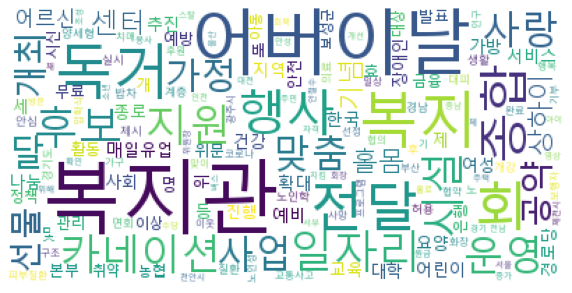

In [41]:
make_cloud(data, '노인')

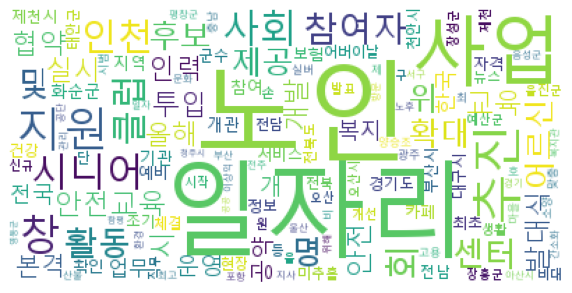

In [42]:
make_cloud(data_2, '노인 일자리')

### 공공데이터 포털 API

In [61]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

In [68]:
# 노인 구인 정보
url = 'http://apis.data.go.kr/B552474/SenuriService/getJobList'
key = 'XmXenimRCP43/5wyQaiqZ0CVMO/4ulD6cUtD00z8cINrnHw7sNrEZU5okkUNM/xH9Tzx4fV21AQAIrh/Ycsotw=='

query = '?' + urlencode(
{
    quote_plus('serviceKey'):key,
    quote_plus('pageNo'):1,
    quote_plus('numOfRows'):10
})

response = requests.get(url+query).text.encode('utf-8')
xml = bs(response, 'lxml-xml')

rows = xml.findAll('item')
rows

[<item><acptMthd>방문</acptMthd><deadline>접수중</deadline><emplymShp>CM0105</emplymShp><emplymShpNm>CM0105</emplymShpNm><frDd>20220506</frDd><jobId>K120252205060040</jobId><oranNm>(주)드림잡</oranNm><organYn>N</organYn><recrtTitle>의정부시 해동 본 타워 시설기사모집</recrtTitle><stmId>B</stmId><stmNm>워크넷</stmNm><toDd>20220705</toDd><workPlc>010060</workPlc><workPlcNm>경기 의정부시</workPlcNm></item>,
 <item><acptMthd>방문</acptMthd><deadline>접수중</deadline><emplymShp>CM0105</emplymShp><emplymShpNm>CM0105</emplymShpNm><frDd>20220506</frDd><jobId>K120422205060051</jobId><jobcls>A08009</jobcls><jobclsNm>기타</jobclsNm><oranNm>(주)에이치아이티에스손해사정</oranNm><organYn>N</organYn><recrtTitle>(주)에이치아이티에스손해사정 정보입력 신입/경력사원 채용</recrtTitle><stmId>B</stmId><stmNm>워크넷</stmNm><toDd>20220705</toDd><workPlc>010200</workPlc><workPlcNm>부산 동구</workPlcNm></item>,
 <item><acptMthd>방문</acptMthd><deadline>접수중</deadline><emplymShp>CM0105</emplymShp><emplymShpNm>CM0105</emplymShpNm><frDd>20220506</frDd><jobId>K120032205060059</jobId><oranNm>(주)유니에스</or

In [79]:
# 노인일자리 사업 참여기관 목록 조회
url = 'http://apis.data.go.kr/B552474/OdsnJobOfferPblancService/getOdsnJobOfferPblancList'
key = 'XmXenimRCP43/5wyQaiqZ0CVMO/4ulD6cUtD00z8cINrnHw7sNrEZU5okkUNM/xH9Tzx4fV21AQAIrh/Ycsotw=='

query = '?' + urlencode(
{
    quote_plus('serviceKey'):key,
    quote_plus('pageNo'):1,
    quote_plus('numOfRows'):10,
    quote_plus('projNo'):'2012-01316',
})

response = requests.get(url+query).text.encode('utf-8')
xml = bs(response, 'lxml-xml')

xml

<?xml version="1.0" encoding="utf-8"?>
<OpenAPI_ServiceResponse>
<cmmMsgHeader>
<errMsg>SERVICE ERROR</errMsg>
<returnAuthMsg>HTTP_ERROR</returnAuthMsg>
<returnReasonCode>04</returnReasonCode>
</cmmMsgHeader>
</OpenAPI_ServiceResponse>

In [87]:
# 자립형 일자리 수행기관 목록 조회
url = 'http://apis.data.go.kr/B552474/JobBsnInfoService/getJobOperInsttList'
key = 'XmXenimRCP43/5wyQaiqZ0CVMO/4ulD6cUtD00z8cINrnHw7sNrEZU5okkUNM/xH9Tzx4fV21AQAIrh/Ycsotw=='

query = '?' + urlencode(
{
    quote_plus('serviceKey'):key,
    quote_plus('pageNo'):1,
    quote_plus('numOfRows'):100,
    quote_plus('dstrCd1'):4800000000,
    quote_plus('dstrCd2'):4817000000,
    quote_plus('projNo'):2022
})

response = requests.get(url+query).text.encode('utf-8')
xml = bs(response, 'lxml-xml')

rows = xml.findAll('item')
rows

[<item><faxNum>******</faxNum><orgCd>0001442</orgCd><orgName>진주노인일자리창출지원센터</orgName><orgTypeNm>수행기관</orgTypeNm><telNum>******</telNum><zipAddr>경상남도 진주시 봉래동 216 봉수동주민센터</zipAddr><zipCode>52751</zipCode></item>,
 <item><faxNum>******</faxNum><orgCd>0276083</orgCd><orgName>(주)제이엠커리어 진주지사</orgName><orgTypeNm>수행기관</orgTypeNm><telNum>******</telNum><zipCode>52725</zipCode></item>]

In [84]:
rows[0]

<item><faxNum>******</faxNum><orgCd>0000021</orgCd><orgName>서울노인복지센터</orgName><orgTypeNm>수행기관</orgTypeNm><telNum>******</telNum><zipAddr>서울특별시 종로구 경운동 90-3</zipAddr><zipCode>03147</zipCode></item>